In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/final_data.csv', index_col=0)
data.head()

/home/raghavjajodia/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,steamid,appid,playtime_forever
0,76561197960270862,30,4
1,76561197960270862,220,1631
2,76561197960270862,300,205
3,76561197960270862,380,229
4,76561197960270862,400,365


In [3]:
data[data['appid'] == 10].shape

(3671, 3)

Analysis if cdf of playtime is helpful

(array([261,  69,  93, ...,   0,   0,   1]),
 array([1.00000000e+00, 1.99602900e+01, 3.89205800e+01, ...,
        1.89599208e+06, 1.89601104e+06, 1.89603000e+06]))

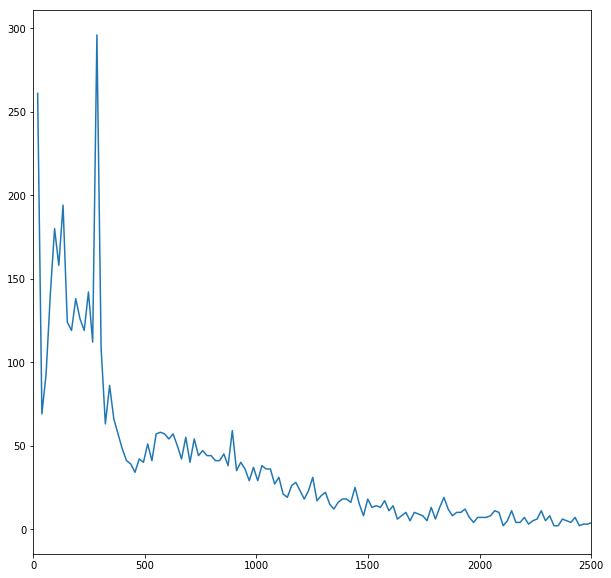

In [4]:
#Pdf of playtime distribution for appid 220

playtimeforapp10 = data.loc[data['appid']==220]['playtime_forever']
numbins = 100000
counts, binedges = np.histogram(playtimeforapp10, bins = numbins )
plt.figure(figsize=(10,10))
plt.plot(binedges[1:], counts)
plt.xlim((0,2500))
counts, binedges

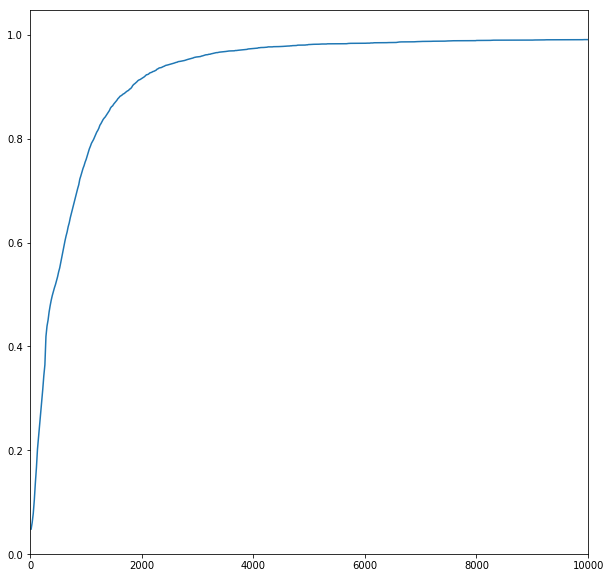

In [5]:
#cdf of playtime distribution for appid 220

ecdf = np.cumsum(counts)
plt.figure(figsize=(10,10))
plt.plot(binedges[1:], ecdf/ecdf[-1])
plt.xlim((1,10000))
plt.show()

In [37]:
class cdfTransformer(object):
    
    transformerSeries = {}
    
    def getLowerOrEqualIndex(self,playtimeList, playtime):
        if playtime < playtimeList[0]:
            return 0
        ans = 0
        low = 0
        high = len(playtimeList) - 1
        while(low<=high):
            mid = low + (high-low)//2
            if playtime > playtimeList[mid]:
                ans = mid
                low = mid + 1
            elif playtime == playtimeList[mid]:
                return mid
            else:
                high = mid - 1
        return ans      
    
    def getNearestCdf(self,appid, playtime):
        playtimeList = self.transformerSeries[appid].index
        bestpos = self.getLowerOrEqualIndex(playtimeList, playtime)
        return self.transformerSeries[appid].iloc[bestpos]
    
    def fitTransform(self,tupledata):
        grouped1 = tupledata.groupby(["appid","playtime_forever"]).count()
        grouped2 = grouped1.groupby(level=[0]).cumsum()
        grouped3 = grouped2.groupby(level = [0]).max()
        withcdf = grouped2/grouped3
        self.transformerSeries = pd.Series(withcdf['steamid'],index=withcdf.index)
        withcdf_df = withcdf.reset_index(level=[0,1])
        withcdf_df.rename(columns={"steamid":"playtime_cdf"}, inplace=True)
        finaltuple = pd.merge(withcdf_df,data, on=['appid','playtime_forever'],how='inner',suffixes=('_newdf',''))
        return finaltuple

    def Transform(self,tupledata):
        ansdata = tupledata.groupby(["appid","playtime_forever"]).count().reset_index()
        ansdata.drop('steamid', inplace = True, axis = 1)
        ansdata['playtime_cdf'] =  ansdata.apply(lambda x: self.getNearestCdf(x['appid'],x['playtime_forever']), axis = 1)
        return ansdata

In [38]:
transformer1 = cdfTransformer()
newdf = transformer1.fitTransform(data)

In [40]:
newdf

,appid,playtime_forever,playtime_cdf,steamid
0,10,1,0.100518,76561197960275345
1,10,1,0.100518,76561197960470481
2,10,1,0.100518,76561197961147005
3,10,1,0.100518,76561197961468715
4,10,1,0.100518,76561197961478640
5,10,1,0.100518,76561197961479454
6,10,1,0.100518,76561197961481720
7,10,1,0.100518,76561197961484390
8,10,1,0.100518,76561197961485425
9,10,1,0.100518,76561197961489900


In [46]:
transformer1.Transform(data[:600000])

,appid,playtime_forever,playtime_cdf
0,10,1,0.100518
1,10,2,0.119314
2,10,3,0.136203
3,10,4,0.149278
4,10,5,0.158540
5,10,6,0.169709
6,10,7,0.181150
7,10,8,0.190139
8,10,9,0.198311
9,10,11,0.213566
